# Chemprop modeling PK dataset
* Format the PK dataset for Chemprop
* Train a chemprop model on binary active/inactive classification

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch

import chemprop

In [3]:
%matplotlib inline

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Chemprop data format

In [5]:
df = pd.read_csv('data/0_raw/updatedPK.csv', usecols=['mol', 'AUC'])
df.rename({'mol': 'smiles'}, axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

<AxesSubplot:ylabel='Frequency'>

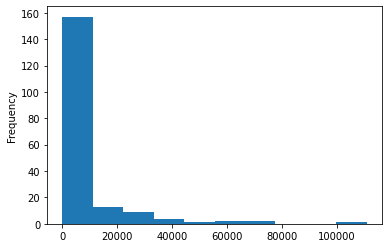

In [6]:
df['AUC'].plot(kind='hist')

In [7]:
# Threshold parameter
df['activity'] = df['AUC'].apply(lambda x: 1 if x > 1000. else 0)

In [8]:
df['activity'].sum()

96

In [9]:
df[['smiles', 'activity']].to_csv('data/0_raw/pk_chemprop_data.csv', index=0)

### Set up Chemprop model

In [10]:
arguments = [
    '--data_path', 'data/0_raw/pk_chemprop_data.csv',
    '--dataset_type', 'classification',
#     '--dataset_type', 'regression',
    '--save_dir', 'pk_checkpoints',
    '--target_columns', 'activity',
    '--ensemble_size', '3',
    '--num_folds', '3',
    '--dropout', '0.2',
    '--extra_metrics', 'prc-auc',
    '--batch_size', '50',
    '--class_balance',
#     '--num_tasks', '1',
    '--epochs', '10',
    '--save_smiles_splits'
]

In [11]:
args = chemprop.args.TrainArgs().parse_args(arguments)

In [12]:
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /home/gridsan/NA30490/.conda/envs/molecules/lib/python3.8/site-packages/ipykernel_launcher.py -f /run/user/30490/jupyter/kernel-5e54b219-e91f-49b3-9726-a89ca237b6e1.json
Args
{'activation': 'ReLU',
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': True,
 'data_path': 'data/0_raw/pk_chemprop_data.csv',
 'data_weights_path': None,
 'dataset_type': 'classification',
 'depth': 3,
 'device': device(type='cuda'),
 'd

In [13]:
mean_score, std_score

(0.6152356902356902, 0.1270129780418159)

### Test performance

In [14]:
perf_df = pd.read_csv('pk_checkpoints/test_scores.csv')

In [15]:
perf_df

,Task,Mean auc,Standard deviation auc,Fold 0 auc,Fold 1 auc,Fold 2 auc,Mean prc-auc,Standard deviation prc-auc,Fold 0 prc-auc,Fold 1 prc-auc,Fold 2 prc-auc
0,activity,0.615236,0.127013,0.488636,0.788889,0.568182,0.678564,0.111356,0.53907,0.811606,0.685016


### Predict from SMILES

In [17]:
arguments = [
    '--test_path', 'pk_checkpoints/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_clf.csv',
    '--checkpoint_dir', 'pk_checkpoints'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Loading data


19it [00:00, 43618.93it/s]
100%|██████████| 19/19 [00:00<00:00, 178281.38it/s]


Validating SMILES
Test size = 19
Predicting with an ensemble of 9 models


  0%|          | 0/9 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 11%|█         | 1/9 [00:00<00:04,  1.66it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 22%|██▏       | 2/9 [00:01<00:03,  2.03it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 33%|███▎      | 3/9 [00:01<00:02,  2.13it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 44%|████▍     | 4/9 [00:01<00:02,  2.18it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 56%|█████▌    | 5/9 [00:02<00:01,  2.17it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 67%|██████▋   | 6/9 [00:02<00:01,  2.18it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 78%|███████▊  | 7/9 [00:03<00:00,  2.22it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 89%|████████▉ | 8/9 [00:03<00:00,  2.19it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

Saving predictions to test_preds_clf.csv
Elapsed time = 0:00:04


In [18]:
df = pd.read_csv('pk_checkpoints/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]
df['pred_class'] = [round(x[0]) for x in preds]
df.head()

,smiles,activity,preds,pred_class
0,S(=O)(=O)(Nc1cc2c(C)c(C(=O)NC(C)C)[nH]c2cc1)CCCCC,0.0,0.532026,1
1,O=C(Nc1c2c(nccc2)ccc1)c1nccnc1,0.0,0.434877,0
2,FC(F)(F)Oc1cc2c([nH]c(C(=O)N3CCN(Cc4oc([N+](=O...,1.0,0.535884,1
3,Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCc3cccc...,0.0,0.488783,0
4,S(=O)(=O)(Nc1cc2c(C)n[nH]c2cc1)CCCC,1.0,0.521043,1


In [19]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay,
                             precision_recall_curve, PrecisionRecallDisplay)

In [20]:
cm = confusion_matrix(df['activity'], df['pred_class'])

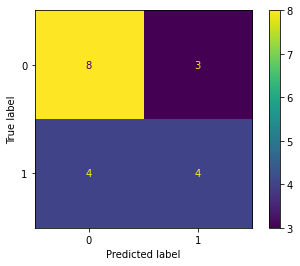

In [21]:
cm_display = ConfusionMatrixDisplay(cm).plot()

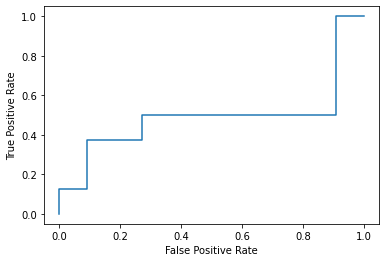

In [22]:
fpr, tpr, _ = roc_curve(df['activity'], df['preds'])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

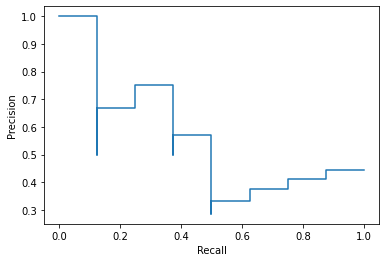

In [23]:
prec, recall, _ = precision_recall_curve(df['activity'], df['preds'])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()